<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Good-Enough-workflow!" data-toc-modified-id="Good-Enough-workflow!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Good Enough workflow!</a></span></li><li><span><a href="#Get-Data" data-toc-modified-id="Get-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Duplicates" data-toc-modified-id="Drop-Duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Duplicates</a></span></li><li><span><a href="#missing-values" data-toc-modified-id="missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>missing values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#waterfront" data-toc-modified-id="waterfront-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>waterfront</a></span></li><li><span><a href="#view" data-toc-modified-id="view-2.2.0.2"><span class="toc-item-num">2.2.0.2&nbsp;&nbsp;</span>view</a></span></li><li><span><a href="#yr_renovated" data-toc-modified-id="yr_renovated-2.2.0.3"><span class="toc-item-num">2.2.0.3&nbsp;&nbsp;</span>yr_renovated</a></span></li></ul></li><li><span><a href="#Recheck-Nan-values" data-toc-modified-id="Recheck-Nan-values-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Recheck Nan values</a></span></li></ul></li><li><span><a href="#Create-Usable-(not-necessarily-final)-datatypes" data-toc-modified-id="Create-Usable-(not-necessarily-final)-datatypes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create Usable (not necessarily final) datatypes</a></span><ul class="toc-item"><li><span><a href="#Drop-date-(look-for-trend-later-if-there-is-time)" data-toc-modified-id="Drop-date-(look-for-trend-later-if-there-is-time)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Drop date (look for trend later if there is time)</a></span></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>sqft_basement</a></span></li></ul></li><li><span><a href="#Drop-all-houses-that-sold-for-more-than-$1m" data-toc-modified-id="Drop-all-houses-that-sold-for-more-than-$1m-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Drop all houses that sold for more than $1m</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Tools" data-toc-modified-id="Tools-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#Explore-(Data-Understanding)" data-toc-modified-id="Explore-(Data-Understanding)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore (Data Understanding)</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Questions</a></span><ul class="toc-item"><li><span><a href="#Does-floors-include-basement?" data-toc-modified-id="Does-floors-include-basement?-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Does floors include basement?</a></span></li></ul></li><li><span><a href="#Can-we-create-a-feature-for-above-not-living-space" data-toc-modified-id="Can-we-create-a-feature-for-above-not-living-space-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Can we create a feature for above not living space</a></span><ul class="toc-item"><li><span><a href="#sqft_living-vs-sqft_above" data-toc-modified-id="sqft_living-vs-sqft_above-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>sqft_living vs sqft_above</a></span><ul class="toc-item"><li><span><a href="#Bedroom" data-toc-modified-id="Bedroom-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>Bedroom</a></span></li></ul></li></ul></li><li><span><a href="#Create-zipcode-bins" data-toc-modified-id="Create-zipcode-bins-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create zipcode bins</a></span><ul class="toc-item"><li><span><a href="#correlations" data-toc-modified-id="correlations-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>correlations</a></span></li></ul></li><li><span><a href="#Multicolinearity" data-toc-modified-id="Multicolinearity-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Multicolinearity</a></span></li></ul></li><li><span><a href="#Model-Assumptions" data-toc-modified-id="Model-Assumptions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Assumptions</a></span></li></ul></div>

# Good Enough workflow!


# Get Data

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

from scipy.stats import shapiro

pd.options.display.max_columns = 100
pd.options.display.max_columns = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import HTML


In [246]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [247]:
len(df)

21597

## Drop Duplicates

In [248]:
df.duplicated().sum()

0

In [249]:
df.index.duplicated().sum()

177

In [250]:
df[df.index.duplicated(keep='last')].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,5,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [251]:
# Duplicates are houses that sold twice in a year.  Drop the first.
df = df[~df.index.duplicated(keep='last')]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [252]:
len(df)

21420

## missing values

In [253]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### waterfront

In [254]:
df.waterfront.value_counts()

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [255]:
# Fill waterfront Nan with 0 (the median)
df['waterfront'] = df['waterfront'].fillna(0)

In [256]:
df['waterfront'].isna().sum()

0

#### view

In [257]:
df.view.value_counts()

0.0    19253
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [258]:
df.view.isna().sum()

63

In [259]:
# Fill with 0 which is far more than half the values
df['view'] = df['view'].fillna(0)

In [260]:
df['view'].isna().sum()

0

#### yr_renovated

In [261]:
df['yr_renovated'].value_counts().head()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [262]:
df['yr_renovated'].isna().sum()

3813

In [263]:
df['yr_renovated'].median()

0.0

In [264]:
# fill with 0 which seems to have the same meaning, no renovation and is also the median of the sample.

In [265]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [266]:
df['yr_renovated'].isna().sum()

0

### Recheck Nan values

In [267]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Create Usable (not necessarily final) datatypes

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  float64
 8   view           21420 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  object 
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float

### Drop date (look for trend later if there is time)
Date is not usable in an obvious way.  If there is time we can try to see if it improves one of our final models.  For now drop it.

In [269]:
df.drop(columns=['date'], inplace=True)

### sqft_basement

In [270]:
# why is the dtype object
df['sqft_basement'].value_counts(normalize = True).head()

0.0      0.593651
?        0.021102
600.0    0.010084
700.0    0.009617
500.0    0.009617
Name: sqft_basement, dtype: float64

In [271]:
# Replace the question mark with the median (0 because more than 50% of records are 0)
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0.0')
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)
df['sqft_basement'].value_counts().head()

0      13168
600      216
700      206
500      206
800      201
Name: sqft_basement, dtype: int64

## Drop all houses that sold for more than $1m
because the stakeholder is only interested in those houses.

In [272]:
#df = df[df['price'] <= 1000000]

## Baseline Model

In [273]:
X = df.drop('price', axis=1)
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:15:27   Log-Likelihood:            -2.9200e+05
No. Observations:               21420   AIC:                         5.840e+05
Df Residuals:                   21401   BIC:                         5.842e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.549e+06   2.95e+06      2.222      0.026    7.72e+05    1.23e+07
bedrooms       -3.59e+04   1913.771    -18.760      0.000   -3.97e+04   -3.22e+04
bathrooms      4.218e+04   3280.968     12.855      0.000    3.57e+04    4.86e+04
sqft_living     103.1092     18.133      5.686      0.000      67.568     138.650
sqft_lot          0.1260      0.048      2.624      0.009       0.032       0.220
floors         6714.1016   3613.628      1.858      0.063    -368.879    1.38e+04
waterfront     6.178e+05   1.82e+04     34.009      0.000    5.82e+05    6.53e+05
view           5.315e+04   2131.390     24.936      0.000     4.9e+04    5.73e+04
condition      2.661e+04   2364.548     11.255      0.000     2.2e+04    3.12e+04
grade          9.698e+04   2171.877     44.654      0.000    9.27e+04    1.01e+05
sqft_above       77.7383     18.123      4.290      0.000      42.216     113.260
sqft_basement    47.7989     17.960      2.661      0.008      12.595      83.003
yr_built      -2651.5626     72.297    -36.676      0.000   -2793.269   -2509.856
yr_renovated     23.5391      3.994      5.893      0.000      15.710      31.368
zipcode        -583.6082     33.188    -17.585      0.000    -648.660    -518.557
lat            6.016e+05   1.08e+04     55.766      0.000     5.8e+05    6.23e+05
long          -2.177e+05   1.32e+04    -16.467      0.000   -2.44e+05   -1.92e+05
sqft_living15    20.9821      3.464      6.057      0.000      14.192      27.772
sqft_lot15       -0.3864      0.073     -5.258      0.000      -0.530      -0.242
==============================================================================
Omnibus:                    18208.361   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1821789.758
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      47.613   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
data_preprocessed = df

# Tools

In [275]:
def cross_validate_rmse(X, y, cv=5):
    '''Returnes Test RMSE, Train RMSE'''
    linreg = LinearRegression()

    mse = make_scorer(mean_squared_error)
    cvs = cross_validate(linreg, X, y, cv=5,    
                          scoring=mse, return_train_score=True)
    
    train_rmse = np.sqrt(cvs['train_score']).mean()
    test_rmse= np.sqrt(cvs['test_score']).mean()
    return  train_rmse, test_rmse, test_rmse - train_rmse

In [276]:
## Test it on the baseline model
cross_validate_rmse(X, y)

(201209.51242025438, 202862.45144721467, 1652.9390269602882)

In [277]:
# a quick way to run a model, perform crossfold validation and get the results.

models = {}
def quicktest(X, y, name=None, display_summary=True):
    
    rmses = cross_validate_rmse(X, y)
                        
    model = sm.OLS(y, sm.add_constant(X)).fit()
    
    if display_summary:
        display(model.summary())
    
    summary = {'r2': round(model.rsquared, 3),
               'train_rmse': round(rmses[0]), 
               'test_rmse': round(rmses[1]), 
               'diff_rmse': round(rmses[2])}
    
    if name is not None:
        models[name] = summary
        
    return summary
    

In [278]:
quicktest(X, y, name='baseline')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:15:29   Log-Likelihood:            -2.9200e+05
No. Observations:               21420   AIC:                         5.840e+05
Df Residuals:                   21401   BIC:                         5.842e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.549e+06   2.95e+06      2.222      0.026    7.72e+05    1.23e+07
bedrooms       -3.59e+04   1913.771    -18.760      0.000   -3.97e+04   -3.22e+04
bathrooms      4.218e+04   3280.968     12.855      0.000    3.57e+04    4.86e+04
sqft_living     103.1092     18.133      5.686      0.000      67.568     138.650
sqft_lot          0.1260      0.048      2.624      0.009       0.032       0.220
floors         6714.1016   3613.628      1.858      0.063    -368.879    1.38e+04
waterfront     6.178e+05   1.82e+04     34.009      0.000    5.82e+05    6.53e+05
view           5.315e+04   2131.390     24.936      0.000     4.9e+04    5.73e+04
condition      2.661e+04   2364.548     11.255      0.000     2.2e+04    3.12e+04
grade          9.698e+04   2171.877     44.654      0.000    9.27e+04    1.01e+05
sqft_above       77.7383     18.123      4.290      0.000      42.216     113.260
sqft_basement    47.7989     17.960      2.661      0.008      12.595      83.003
yr_built      -2651.5626     72.297    -36.676      0.000   -2793.269   -2509.856
yr_renovated     23.5391      3.994      5.893      0.000      15.710      31.368
zipcode        -583.6082     33.188    -17.585      0.000    -648.660    -518.557
lat            6.016e+05   1.08e+04     55.766      0.000     5.8e+05    6.23e+05
long          -2.177e+05   1.32e+04    -16.467      0.000   -2.44e+05   -1.92e+05
sqft_living15    20.9821      3.464      6.057      0.000      14.192      27.772
sqft_lot15       -0.3864      0.073     -5.258      0.000      -0.530      -0.242
==============================================================================
Omnibus:                    18208.361   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1821789.758
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      47.613   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'r2': 0.7, 'train_rmse': 201210.0, 'test_rmse': 202862.0, 'diff_rmse': 1653.0}

In [279]:
# pretty print the models and sort by rmse
def model_report():
    df = pd.DataFrame(models).T
    #df.columns = ['r2', 'train_rmse', 'test_rmse', 'diff_rmse']
    df = df.sort_values(by='r2')
    return df[['r2', 'train_rmse', 'test_rmse', 'diff_rmse']]

{'baseline': {'r2': 0.7,
  'train_rmse': 201210.0,
  'test_rmse': 202862.0,
  'diff_rmse': 1653.0}}

In [280]:
model_report()

,r2,train_rmse,test_rmse,diff_rmse
baseline,0.7,201210.0,202862.0,1653.0


# Explore (Data Understanding)

In [281]:
df = data_preprocessed.copy()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [282]:
# Look to see if the relationship is linear between each variable and price

## Questions
### Does floors include basement?

In [283]:
def scatter_cols(df, dv):
    '''Takes a dataframe and a dependent variable and prints scatterplots of each varible agains the d pendent variable'''
    
    cols = df.columns
    #calculate number of rows assuming 3 plots per row
    rows = len(cols) // 3 + bool(len(cols) % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(12,rows*3))
    
    axs = np.array(axs).flatten()

    for n, col in enumerate(cols):
        #df_pp.plot.scatter(x=col, y=target, ax = axs[n])
        sns.scatterplot(x=df[col], y=dv, ax=axs[n])
        plt.xlabel(col)

    plt.tight_layout()

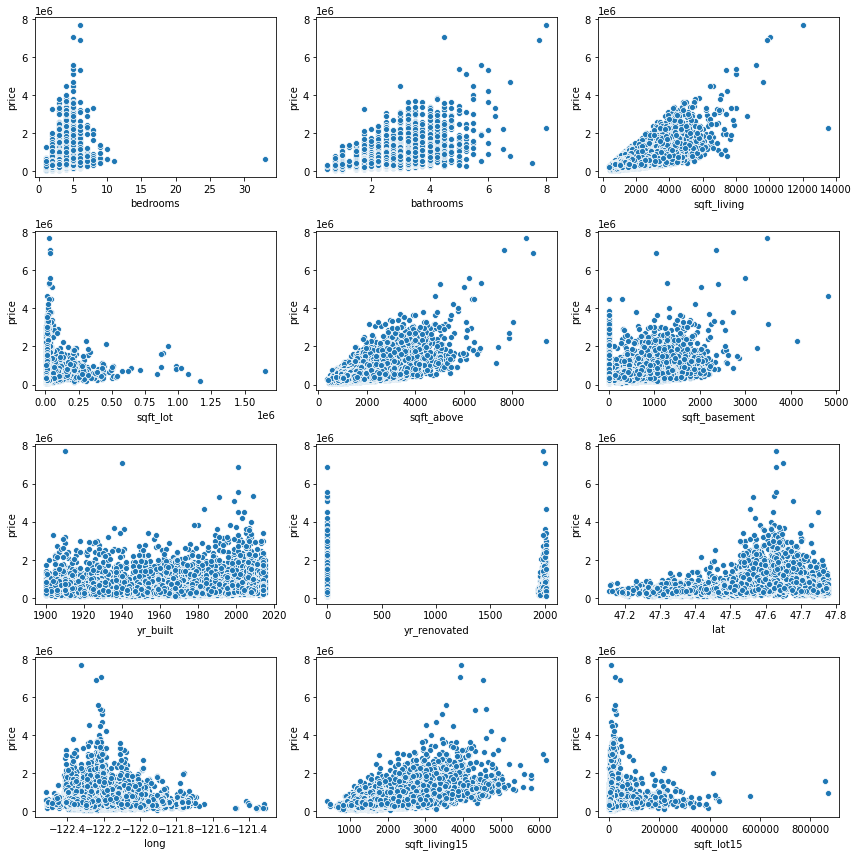

In [284]:
continuous = ['bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'sqft_above', 'sqft_basement',
                 'yr_built', 'yr_renovated', 'lat', 'long', 
                 'sqft_living15', 'sqft_lot15']
                                

scatter_cols(df[continuous], df['price'])

In [320]:
## drop variables that do not appear to have a linear relationship to price
df2 = df.drop(columns=['sqft_lot', 'sqft_lot15'])

In [321]:
def boxplot_cols(df, dv):
    '''Takes a dataframe and a dependent variable and prints scatterplots of each varible agains the d pendent variable'''
    
    cols = df.columns
    #calculate number of rows assuming 3 plots per row
    rows = len(cols) // 3 + bool(len(cols) % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(12,rows*3))
    
    axs = np.array(axs).flatten()

    for n, col in enumerate(cols):
        #df_pp.plot.scatter(x=col, y=target, ax = axs[n])
        sns.boxenplot(x=df[col], y=dv, ax=axs[n])
        plt.xlabel(col)

    plt.tight_layout()

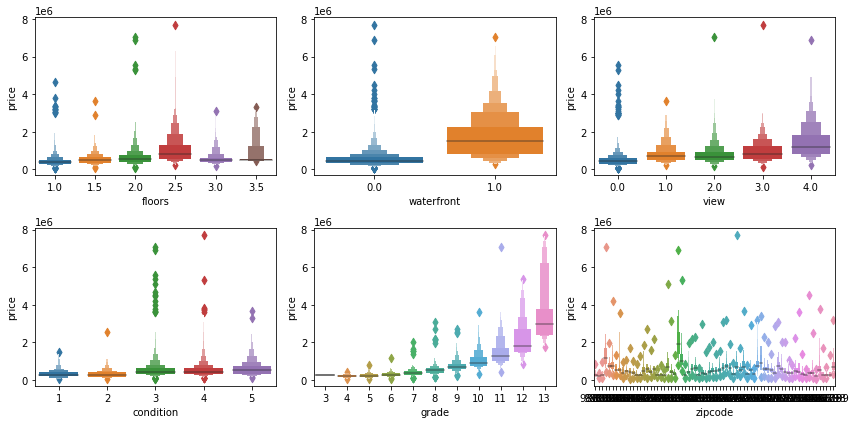

In [322]:
boxplot_cols(df[categoricals], df['price'])

In [323]:
# floors does not have a linear relation ship with price.  Drop it.
df2 = df2.drop(columns=['floors'])
df2.head(2)

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_living_above
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,0
6414100192,538000.0,3,2.25,2570,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,0


The other variable look relatively linear.

sqft_living seems to have some prominent outliers.  Lets remove them.


Outliers detected: 32


Text(0.5, 0, 'sqft_living')

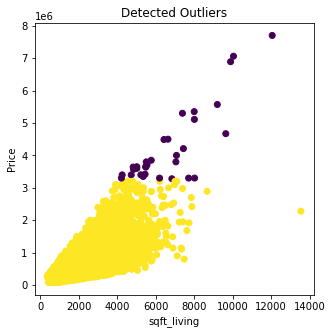

In [324]:
model = DBSCAN(eps = 150000, min_samples = 20).fit(df2[['price', 'sqft_living']])

plt.figure(figsize=(5,5))
plt.scatter(df2['sqft_living'], df2['price'], c = model.labels_)

print('Outliers detected:', (model.labels_ < 0).sum())

plt.title('Detected Outliers')
plt.ylabel('Price')
plt.xlabel('sqft_living')

In [325]:
# drop those and that one pesky 14000 sqft_house that didn't get picked up for some reason.

21388
21387


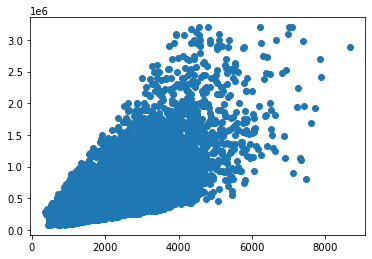

In [326]:
df3 = df2[model.labels_ > -1]
print(len(df3))
df3 = df3[df3['sqft_living'] < 10000]
print(len(df3))

plt.scatter(df3['sqft_living'], df3['price'])

In [327]:
X = df3.drop('price', axis=1)
y = df3['price']

quicktest(X, y, name='1 (nonlinear feature and outlier removal)', display_summary=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3440.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:30:33   Log-Likelihood:            -2.8935e+05
No. Observations:               21387   AIC:                         5.787e+05
Df Residuals:                   21371   BIC:                         5.789e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.916e+05    2.6e+06      0.304      0.761   -4.31e+06    5.89e+06
bedrooms          -2.597e+04   1728.802    -15.024      0.000   -2.94e+04   -2.26e+04
bathrooms          4.245e+04   2861.419     14.835      0.000    3.68e+04    4.81e+04
sqft_living          84.6388      4.586     18.457      0.000      75.651      93.627
waterfront         4.481e+05   1.72e+04     26.077      0.000    4.14e+05    4.82e+05
view                5.56e+04   1928.078     28.839      0.000    5.18e+04    5.94e+04
condition          2.784e+04   2130.933     13.064      0.000    2.37e+04     3.2e+04
grade              1.008e+05   1957.828     51.465      0.000    9.69e+04    1.05e+05
sqft_above           58.9233      4.481     13.149      0.000      50.140      67.707
sqft_basement        28.3454      4.540      6.244      0.000      19.447      37.244
yr_built          -2492.9542     63.707    -39.132      0.000   -2617.824   -2368.084
yr_renovated         23.2203      3.612      6.429      0.000      16.141      30.300
zipcode            -507.9127     29.856    -17.012      0.000    -566.433    -449.392
lat                5.999e+05   9676.120     62.001      0.000    5.81e+05    6.19e+05
long              -2.021e+05   1.17e+04    -17.326      0.000   -2.25e+05   -1.79e+05
sqft_living15        35.4851      3.120     11.374      0.000      29.370      41.600
sqft_living_above    -2.6298     12.097     -0.217      0.828     -26.341      21.082
==============================================================================
Omnibus:                    10807.501   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156386.831
Skew:                           2.082   Prob(JB):                         0.00
Kurtosis:                      15.576   Cond. No.                     2.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

{'r2': 0.707,
 'train_rmse': 181605.0,
 'test_rmse': 182984.0,
 'diff_rmse': 1378.0}

In [328]:
model_report()

,r2,train_rmse,test_rmse,diff_rmse
baseline,0.700,201210.0,202862.0,1653.0
1 (nonlinear feature and outlier removal),0.707,181605.0,182984.0,1378.0


## Can we create a feature for above not living space

The stakeholder asked if we could determine the value of above ground non-living space like a sun room.  Lets try to engineer that feature

### sqft_living vs sqft_above

The relationship between sqft_living and sqft_above is that sqft_above sometime has more space that isn't considered living space (sunporch, garage etc.). So lets subtract sqft_living from sqft_above to get the difference.  That should remain useful and also remove the correlation.

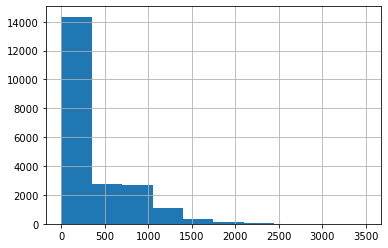

In [329]:
sqft_above_diff_living = df3['sqft_living'] - df3['sqft_above']
sqft_above_diff_living.name = 'sqft_above_diff_living'
sqft_above_diff_living.hist()

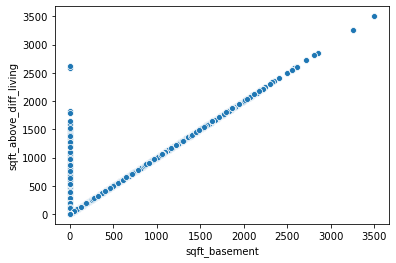

In [330]:
sns.scatterplot(x=df3['sqft_basement'],y=sqft_above_diff_living)

It looks like there are 2 kinds of sqft_living that are not part of sqft_above, basements, and other (porches etc), lets separate them.  We already have basements accounted for so lets create sqft_living_above

In [331]:
# get living space not included in above
df3['sqft_living_above'] = sqft_above_diff_living - df3['sqft_basement']

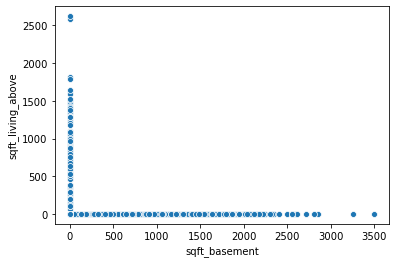

In [332]:
sns.scatterplot(x=df3['sqft_basement'],y=df3['sqft_living_above'])

In [333]:
# test it
df3[['sqft_living', 'sqft_living_above']].corr()

,sqft_living,sqft_living_above
sqft_living,1.000000,0.055208
sqft_living_above,0.055208,1.000000


In [334]:
X = df3.drop(columns=['price'])
y = df3['price']
quicktest(X, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3440.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:30:36   Log-Likelihood:            -2.8935e+05
No. Observations:               21387   AIC:                         5.787e+05
Df Residuals:                   21371   BIC:                         5.789e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.916e+05    2.6e+06      0.304      0.761   -4.31e+06    5.89e+06
bedrooms          -2.597e+04   1728.802    -15.024      0.000   -2.94e+04   -2.26e+04
bathrooms          4.245e+04   2861.419     14.835      0.000    3.68e+04    4.81e+04
sqft_living          84.6388      4.586     18.457      0.000      75.651      93.627
waterfront         4.481e+05   1.72e+04     26.077      0.000    4.14e+05    4.82e+05
view                5.56e+04   1928.078     28.839      0.000    5.18e+04    5.94e+04
condition          2.784e+04   2130.933     13.064      0.000    2.37e+04     3.2e+04
grade              1.008e+05   1957.828     51.465      0.000    9.69e+04    1.05e+05
sqft_above           58.9233      4.481     13.149      0.000      50.140      67.707
sqft_basement        28.3454      4.540      6.244      0.000      19.447      37.244
yr_built          -2492.9542     63.707    -39.132      0.000   -2617.824   -2368.084
yr_renovated         23.2203      3.612      6.429      0.000      16.141      30.300
zipcode            -507.9127     29.856    -17.012      0.000    -566.433    -449.392
lat                5.999e+05   9676.120     62.001      0.000    5.81e+05    6.19e+05
long              -2.021e+05   1.17e+04    -17.326      0.000   -2.25e+05   -1.79e+05
sqft_living15        35.4851      3.120     11.374      0.000      29.370      41.600
sqft_living_above    -2.6298     12.097     -0.217      0.828     -26.341      21.082
==============================================================================
Omnibus:                    10807.501   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156386.831
Skew:                           2.082   Prob(JB):                         0.00
Kurtosis:                      15.576   Cond. No.                     2.26e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

{'r2': 0.707,
 'train_rmse': 181605.0,
 'test_rmse': 182984.0,
 'diff_rmse': 1378.0}

#### Bedroom

Bedroom is also nonlinear but we would like to try to understand the value of a bedroom for our client.  I will try to construct a feature that does have a linear relationship to price.

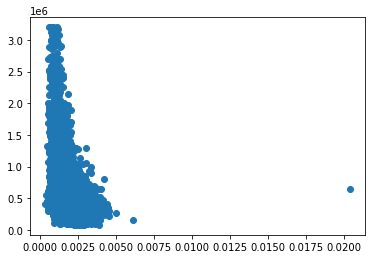

In [352]:
# bedrooms / sqft_living

beds_sqft = df3['bedrooms'] / df3['sqft_living']
plt.scatter(beds_sqft, df3['price'])

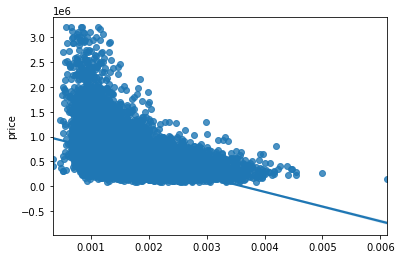

In [353]:
# drop that outlier
df4 = df3[beds_sqft < 0.01].copy()
beds_sqft = df4['bedrooms'] / df4['sqft_living']
sns.regplot(x=beds_sqft, y=df4['price'])

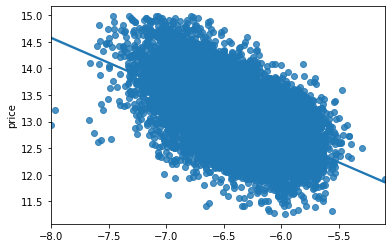

In [369]:
sns.regplot(x=np.log(beds_sqft), y=np.log(df4['price']))

That does have a liner relationship.  It might tell us something.  Lets try to do something similar for baths.

In [364]:
df4['beds/sqft'] = beds_sqft

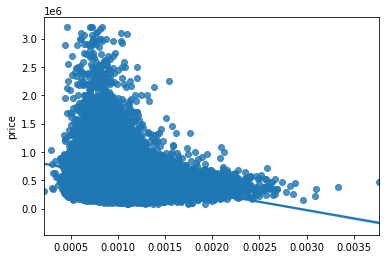

In [365]:
# bathrooms / sqft_living

baths_sqft = df4['bathrooms'] / df4['sqft_living']
sns.regplot(x=baths_sqft, y=df4['price'])

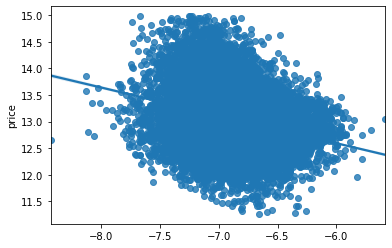

In [370]:
sns.regplot(x=np.log(baths_sqft), y=np.log(df4['price']))

In [371]:
# Add the new feature
df4['bathrooms/sqft'] = baths_sqft

In [372]:
# test the model
X = df4.drop('price', axis=1)
y = df4['price']

quicktest(X, y, name='2 (bed/sqft and bath/sqft)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3193.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:49:44   Log-Likelihood:            -2.8895e+05
No. Observations:               21386   AIC:                         5.779e+05
Df Residuals:                   21368   BIC:                         5.781e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.704e+06   2.56e+06      0.666      0.506   -3.31e+06    6.72e+06
bedrooms          -8.391e+04   3173.315    -26.442      0.000   -9.01e+04   -7.77e+04
bathrooms          5.069e+04   6614.289      7.664      0.000    3.77e+04    6.37e+04
sqft_living         151.4489      5.635     26.877      0.000     140.404     162.494
waterfront         4.448e+05   1.69e+04     26.353      0.000    4.12e+05    4.78e+05
view               5.235e+04   1897.410     27.590      0.000    4.86e+04    5.61e+04
condition          2.897e+04   2093.841     13.836      0.000    2.49e+04    3.31e+04
grade              9.983e+04   1924.618     51.868      0.000    9.61e+04    1.04e+05
sqft_above           75.3917      4.549     16.573      0.000      66.475      84.308
sqft_basement        55.6196      4.616     12.049      0.000      46.571      64.668
yr_built          -2406.5326     63.285    -38.027      0.000   -2530.576   -2282.489
yr_renovated         26.6019      3.550      7.493      0.000      19.643      33.561
zipcode            -521.3211     29.331    -17.773      0.000    -578.813    -463.829
lat                6.044e+05   9514.749     63.524      0.000    5.86e+05    6.23e+05
long              -2.002e+05   1.15e+04    -17.457      0.000   -2.23e+05   -1.78e+05
sqft_living15        40.7904      3.070     13.285      0.000      34.772      46.809
sqft_living_above    20.4396     11.932      1.713      0.087      -2.947      43.827
beds/sqft           1.29e+08   5.49e+06     23.514      0.000    1.18e+08     1.4e+08
bathrooms/sqft     8.638e+06   1.14e+07      0.757      0.449   -1.37e+07     3.1e+07
==============================================================================
Omnibus:                     9950.319   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135455.340
Skew:                           1.884   Prob(JB):                         0.00
Kurtosis:                      14.739   Cond. No.                     3.03e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

{'r2': 0.718,
 'train_rmse': 178366.0,
 'test_rmse': 179610.0,
 'diff_rmse': 1245.0}

In [373]:
model_report()

,r2,train_rmse,test_rmse,diff_rmse
baseline,0.700,201210.0,202862.0,1653.0
1 (nonlinear feature and outlier removal),0.707,181605.0,182984.0,1378.0
2 (bed/sqft and bath/sqft),0.718,178366.0,179610.0,1245.0


## Create zipcode bins

In [378]:
df4[sorted(df4.columns)].head(2)

,bathrooms,bathrooms/sqft,bedrooms,beds/sqft,condition,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_living_above,view,waterfront,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,,,,
7129300520,1.00,0.000847,3,0.002542,3,7,47.5112,-122.257,221900.0,1180,0,1180,1340,0,0.0,0.0,1955,0.0,98178
6414100192,2.25,0.000875,3,0.001167,3,7,47.7210,-122.319,538000.0,2170,400,2570,1690,0,0.0,0.0,1951,1991.0,98125


In [398]:
# create a price_sqft dataframe with price_sqft and zip

price_sqft = df4[['zipcode']].copy()
price_sqft['price_sqft'] = df4['price'] / df4['sqft_living']

zip_median = price_sqft.groupby('zipcode').median()

zip_median

,price_sqft
zipcode,
98001,147.275708
98002,147.368421
98003,155.171397
98004,454.022989
98005,316.340431
...,...
98177,272.074830
98178,176.970326
98188,165.000000


testing zipcodes with 1 bins
testing zipcodes with 2 bins
testing zipcodes with 3 bins
testing zipcodes with 4 bins
testing zipcodes with 5 bins
testing zipcodes with 6 bins
testing zipcodes with 7 bins
testing zipcodes with 8 bins
testing zipcodes with 9 bins
testing zipcodes with 10 bins
testing zipcodes with 11 bins
testing zipcodes with 12 bins
testing zipcodes with 13 bins
testing zipcodes with 14 bins


,binsizes,r2,train_rmse,test_rmse
0,1.0,0.713,179686.0,180841.0
1,2.0,0.747,168700.0,169641.0
2,3.0,0.774,159621.0,160146.0
3,4.0,0.785,155737.0,156239.0
4,5.0,0.789,154308.0,154815.0
5,6.0,0.795,152121.0,152617.0
6,7.0,0.799,150444.0,150961.0
7,8.0,0.807,147381.0,147948.0
8,9.0,0.812,145438.0,145971.0
9,10.0,0.810,146487.0,146952.0


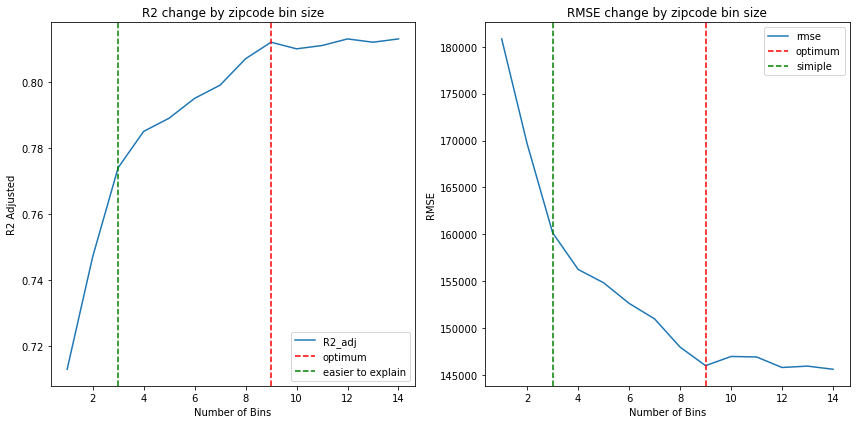

In [416]:
#group zipcodes by mean saleprice
test_rmses = []
train_rmses =[]
r2s = []
binsizes = []


def bin_zipcodes(df_temp, bins):
    print(f"testing zipcodes with {bins} bins")

    zip_cats = pd.qcut(zip_median['price_sqft'].sort_values(), 
                       bins, labels=list(range(1, bins+1)))

    zipcode_cat = df_temp['zipcode'].map(zip_cats)
    
    dummies = pd.get_dummies(zipcode_cat, prefix='zipcat', 
                             drop_first=True)

    df_temp = df_temp.combine_first(dummies)
    
    df_temp = df_temp.drop('zipcode', axis=1)
    
    return df_temp
    
for bins in range(1,15):

    df_temp = bin_zipcodes(df4, bins)

    X= df_temp.drop(columns=['price'])
    y =df_temp['price']
    summary = quicktest(X, y, display_summary=False)

    train_rmses.append(summary['train_rmse'])
    test_rmses.append(summary['test_rmse'])
    r2s.append(summary['r2'])
    binsizes.append(bins)
    
report = pd.DataFrame([binsizes, r2s, train_rmses, test_rmses]).T
report.columns = ['binsizes', 'r2', 'train_rmse', 'test_rmse']
display(pd.DataFrame(report))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

plt.sca(ax1)
plt.plot(binsizes, r2s, label='R2_adj')
plt.title('R2 change by zipcode bin size')
plt.ylabel('R2 Adjusted')
plt.xlabel('Number of Bins')
plt.axvline(x=9, c='r', ls='--', label='optimum' )
plt.axvline(x=3, c='g', ls='--', label='easier to explain' )
plt.legend()

plt.sca(ax2)
plt.plot(binsizes, test_rmses, label='rmse')
plt.title('RMSE change by zipcode bin size')
plt.ylabel('RMSE')
plt.xlabel('Number of Bins')
plt.axvline(x=9, c='r', ls='--', label='optimum' )
plt.axvline(x=3, c='g', ls='--', label='simiple' )
plt.legend()

plt.tight_layout()

I am going to use the "easier to explain" inflection point because we are most interested in being able to explain the relationships to the stake holder.

In [421]:
df5 = bin_zipcodes(df4, 3)
X = df5.drop(columns=['price'])
y = df5['price']

quicktest(X,y,name ='3 (zipcode cats)')

testing zipcodes with 3 bins


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4064.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:32:17   Log-Likelihood:            -2.8657e+05
No. Observations:               21386   AIC:                         5.732e+05
Df Residuals:                   21367   BIC:                         5.733e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.368e+06   1.32e+06     -3.308      0.001   -6.96e+06   -1.78e+06
bathrooms          7.303e+04   5924.746     12.326      0.000    6.14e+04    8.46e+04
bathrooms/sqft    -7.629e+07   1.03e+07     -7.431      0.000   -9.64e+07   -5.62e+07
bedrooms          -8.955e+04   2839.661    -31.534      0.000   -9.51e+04    -8.4e+04
beds/sqft          1.507e+08   4.92e+06     30.644      0.000    1.41e+08     1.6e+08
condition          2.915e+04   1861.426     15.660      0.000    2.55e+04    3.28e+04
grade              6.831e+04   1778.759     38.404      0.000    6.48e+04    7.18e+04
lat                2.784e+05   1.25e+04     22.207      0.000    2.54e+05    3.03e+05
long                6.03e+04   9526.483      6.329      0.000    4.16e+04     7.9e+04
sqft_above           82.6700      4.070     20.310      0.000      74.692      90.648
sqft_basement        44.7516      4.133     10.828      0.000      36.651      52.852
sqft_living         141.9511      5.042     28.156      0.000     132.069     151.833
sqft_living15        50.8426      2.732     18.609      0.000      45.487      56.198
sqft_living_above    14.5609     10.674      1.364      0.173      -6.362      35.483
view               4.599e+04   1691.020     27.199      0.000    4.27e+04    4.93e+04
waterfront         5.124e+05   1.51e+04     33.844      0.000    4.83e+05    5.42e+05
yr_built          -1170.9505     58.187    -20.124      0.000   -1285.002   -1056.899
yr_renovated         26.7383      3.176      8.419      0.000      20.513      32.963
zipcat_2           6.129e+04   4019.113     15.249      0.000    5.34e+04    6.92e+04
zipcat_3           2.576e+05   4186.166     61.542      0.000    2.49e+05    2.66e+05
==============================================================================
Omnibus:                    11888.807   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244671.493
Skew:                           2.245   Prob(JB):                         0.00
Kurtosis:                      18.951   Cond. No.                     1.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

{'r2': 0.774,
 'train_rmse': 159621.0,
 'test_rmse': 160146.0,
 'diff_rmse': 526.0}

In [420]:
model_report()

,r2,train_rmse,test_rmse,diff_rmse
baseline,0.700,201210.0,202862.0,1653.0
1 (nonlinear feature and outlier removal),0.707,181605.0,182984.0,1378.0
2 (bed/sqft and bath/sqft),0.718,178366.0,179610.0,1245.0


In [425]:


zip_cats = pd.qcut(zip_median['price_sqft'].sort_values(), 
                       bins, labels=list(range(1, bins+1)))

zipcode_cat = df4['zipcode'].map(zip_cats)

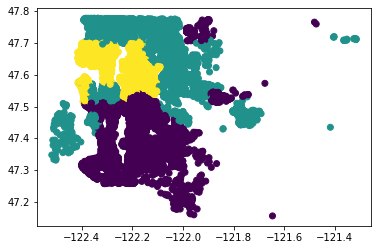

In [427]:
# visualize the zones

zones = 3
zip_cats = pd.qcut(zip_median['price_sqft'].sort_values(), zones, labels=(range(zones)))
zipcode_cat = df4['zipcode'].map(zip_cats)
plt.scatter(df4['long'], df4['lat'], c=zipcode_cat)


### correlations

In [335]:
def corr_heatmap(df,figsize=(6, 4),hide_prefix=False):
    '''Output a correlation heatmap from a Pandas DataFrame'''
    
    # hide selected prefix
    if hide_prefix:
        df = df[df.columns[~df.columns.str.startswith(hide_prefix)]]
    
    cols = set(df.columns)
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,
                linewidths=0.3, cbar_kws={"shrink": .7},
                vmin=-1, vmax=1, annot=True);

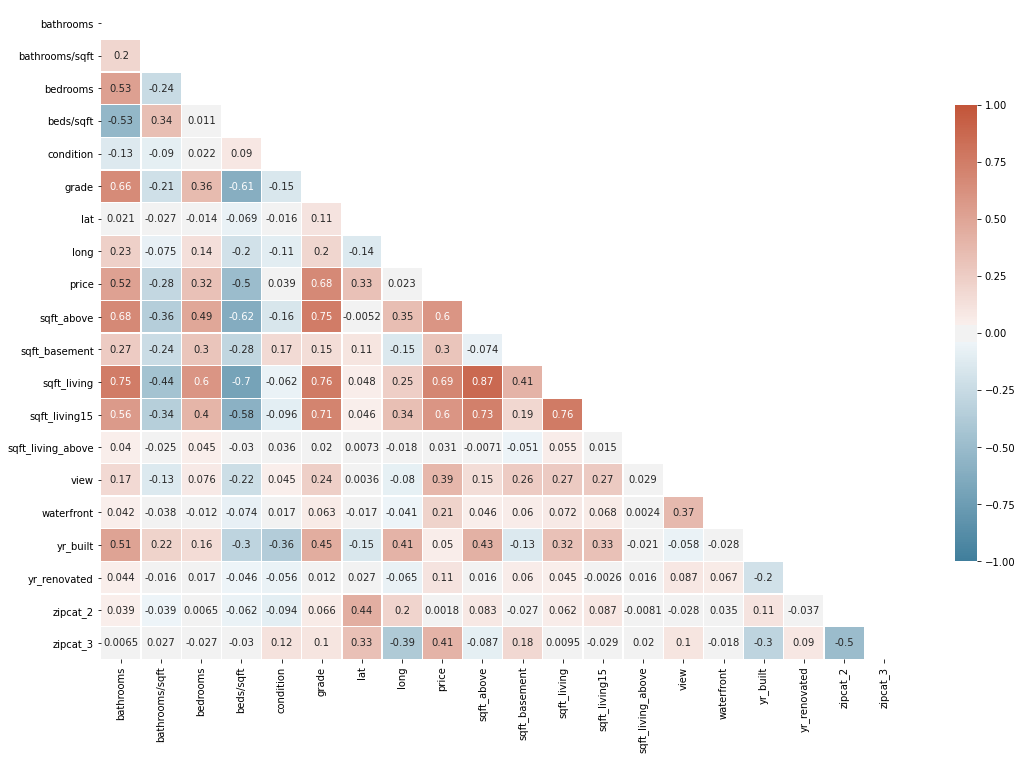

In [446]:
corr_heatmap(df5,figsize=(18,12))

Sqft living is correlated with a lot of things.  Lets see if that has an intersection with zipcode_cat.

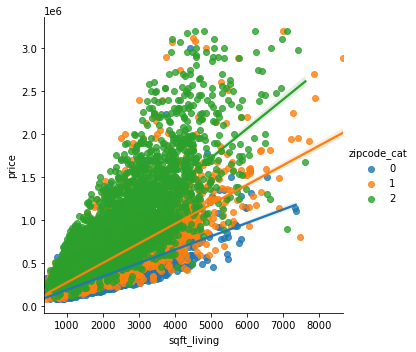

In [430]:
df_lm = df5[['price', 'sqft_living']].copy()

df_lm['zipcode_cat'] = zipcode_cat

df_lm.head()
sns.lmplot(x='sqft_living', y='price', hue='zipcode_cat', data=df_lm)

There is an interaction.  We need all zipcode_cat dummies in our dataframe to multiply by.

In [440]:
df6 = df5.copy()

# fill in zipcat_1
df6['zipcat_1'] = 1 - df6['zipcat_2'] - df6['zipcat_3']
df6.head()

,bathrooms,bathrooms/sqft,bedrooms,beds/sqft,condition,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_living_above,view,waterfront,yr_built,yr_renovated,zipcat_2,zipcat_3,zipcat_1
id,,,,,,,,,,,,,,,,,,,,,
7129300520,1.00,0.000847,3,0.002542,3,7,47.5112,-122.257,221900.0,1180,0,1180,1340,0,0.0,0.0,1955,0.0,0.0,0.0,1.0
6414100192,2.25,0.000875,3,0.001167,3,7,47.7210,-122.319,538000.0,2170,400,2570,1690,0,0.0,0.0,1951,1991.0,1.0,0.0,0.0
5631500400,1.00,0.001299,2,0.002597,3,6,47.7379,-122.233,180000.0,770,0,770,2720,0,0.0,0.0,1933,0.0,1.0,0.0,0.0
2487200875,3.00,0.001531,4,0.002041,5,7,47.5208,-122.393,604000.0,1050,910,1960,1360,0,0.0,0.0,1965,0.0,0.0,1.0,0.0
1954400510,2.00,0.001190,3,0.001786,3,8,47.6168,-122.045,510000.0,1680,0,1680,1800,0,0.0,0.0,1987,0.0,1.0,0.0,0.0


In [441]:
# multiply sqft_living by each zipcat and drop sqft_living

df6['zipcat_1_x_sqft_living'] = df6['sqft_living'] * df6['zipcat_1']
df6['zipcat_2_x_sqft_living'] = df6['sqft_living'] * df6['zipcat_2']
df6['zipcat_3_x_sqft_living'] = df6['sqft_living'] * df6['zipcat_3']

df6 = df6.drop(columns=['zipcat_1', 'zipcat_2', 'zipcat_3', 'sqft_living'])
df6.head()

,bathrooms,bathrooms/sqft,bedrooms,beds/sqft,condition,grade,lat,long,price,sqft_above,sqft_basement,sqft_living15,sqft_living_above,view,waterfront,yr_built,yr_renovated,zipcat_1_x_sqft_living,zipcat_2_x_sqft_living,zipcat_3_x_sqft_living
id,,,,,,,,,,,,,,,,,,,,
7129300520,1.00,0.000847,3,0.002542,3,7,47.5112,-122.257,221900.0,1180,0,1340,0,0.0,0.0,1955,0.0,1180.0,0.0,0.0
6414100192,2.25,0.000875,3,0.001167,3,7,47.7210,-122.319,538000.0,2170,400,1690,0,0.0,0.0,1951,1991.0,0.0,2570.0,0.0
5631500400,1.00,0.001299,2,0.002597,3,6,47.7379,-122.233,180000.0,770,0,2720,0,0.0,0.0,1933,0.0,0.0,770.0,0.0
2487200875,3.00,0.001531,4,0.002041,5,7,47.5208,-122.393,604000.0,1050,910,1360,0,0.0,0.0,1965,0.0,0.0,0.0,1960.0
1954400510,2.00,0.001190,3,0.001786,3,8,47.6168,-122.045,510000.0,1680,0,1800,0,0.0,0.0,1987,0.0,0.0,1680.0,0.0


In [444]:
X = df6.drop('price', axis=1)
y = df6['price']

quicktest(X, y, name='4 (zip sqft interaction)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     4980.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:53:10   Log-Likelihood:            -2.8485e+05
No. Observations:               21386   AIC:                         5.697e+05
Df Residuals:                   21367   BIC:                         5.699e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.641e+06   1.18e+06     -3.092      0.002   -5.95e+06   -1.33e+06
bathrooms                5.75e+04   5460.351     10.531      0.000    4.68e+04    6.82e+04
bathrooms/sqft           -5.4e+07   9.44e+06     -5.722      0.000   -7.25e+07   -3.55e+07
bedrooms               -7.812e+04   2625.017    -29.761      0.000   -8.33e+04    -7.3e+04
beds/sqft               1.207e+08   4.54e+06     26.561      0.000    1.12e+08     1.3e+08
condition               2.276e+04   1719.917     13.231      0.000    1.94e+04    2.61e+04
grade                   6.247e+04   1634.282     38.223      0.000    5.93e+04    6.57e+04
lat                     2.618e+05   1.04e+04     25.152      0.000    2.41e+05    2.82e+05
long                    6.054e+04   8734.769      6.931      0.000    4.34e+04    7.77e+04
sqft_above               129.8188      3.414     38.020      0.000     123.126     136.511
sqft_basement             74.3020      3.606     20.603      0.000      67.233      81.371
sqft_living15             58.0254      2.523     22.999      0.000      53.080      62.970
sqft_living_above         47.2314     11.082      4.262      0.000      25.510      68.953
view                    4.067e+04   1561.913     26.041      0.000    3.76e+04    4.37e+04
waterfront              5.442e+05    1.4e+04     38.912      0.000    5.17e+05    5.72e+05
yr_built               -1016.3505     53.396    -19.034      0.000   -1121.010    -911.691
yr_renovated              20.9627      2.931      7.152      0.000      15.217      26.708
zipcat_1_x_sqft_living    24.6595      3.319      7.430      0.000      18.154      31.165
zipcat_2_x_sqft_living    62.4375      3.168     19.711      0.000      56.229      68.646
zipcat_3_x_sqft_living   164.1222      3.166     51.838      0.000     157.916     170.328
==============================================================================
Omnibus:                    10448.002   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236627.146
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                      18.873   Cond. No.                     4.10e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

{'r2': 0.808,
 'train_rmse': 147292.0,
 'test_rmse': 147731.0,
 'diff_rmse': 439.0}

In [443]:
model_report()

,r2,train_rmse,test_rmse,diff_rmse
baseline,0.700,201210.0,202862.0,1653.0
1 (nonlinear feature and outlier removal),0.707,181605.0,182984.0,1378.0
2 (bed/sqft and bath/sqft),0.718,178366.0,179610.0,1245.0
3 (zipcode cats),0.774,159621.0,160146.0,526.0


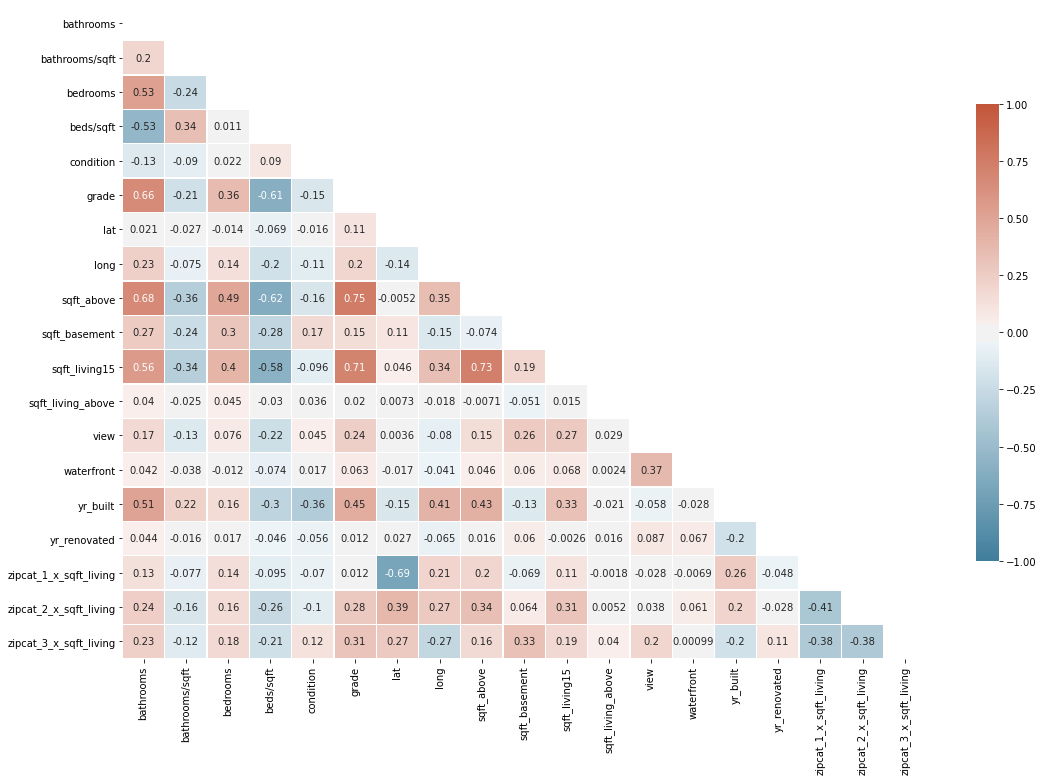

In [447]:
corr_heatmap(df6.drop('price', axis=1), figsize=(18,12))

Thats not too bad so lets move on to multicolinierity which will probably take care of some of the higher values here.

## Multicolinearity

In [448]:
### Multicoliniarity
def multicolinearity_check(df):
    '''Takes a DataFrame and prints variance_inflation_vactor for all cols'''
    vifs = []
    for i, col in enumerate(df.columns):
        vif = variance_inflation_factor(df.values, i)
        vifs.append(vif)
    vifs = pd.DataFrame(vifs, index=df.columns,columns=['vif'])
    vifs = vifs.sort_values(by='vif', ascending=False)
    display(HTML('<H3>MULTICOLINIERITY CHECK (vif)'))
#    print('MULTICOLINIERITY CHECK (vif)')
    display(vifs);

In [462]:
pd.options.display.max_rows = 999
multicolinearity_check(df6.drop('price', axis=1))

/Users/benbogart/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
sqft_basement,inf
sqft_above,inf
zipcat_2_x_sqft_living,inf
zipcat_1_x_sqft_living,inf
sqft_living_above,inf
zipcat_3_x_sqft_living,inf
long,2.133468e+05
lat,2.087437e+05
yr_built,9.647079e+03
grade,1.542085e+02


In [466]:
df7 = df6.drop(columns=['sqft_basement'])
multicolinearity_check(df7.drop('price', axis=1))

,vif
long,213346.813951
lat,208743.726405
yr_built,9647.078950
grade,154.208502
bathrooms,148.015755
bathrooms/sqft,110.367585
bedrooms,82.369959
beds/sqft,71.670749
zipcat_2_x_sqft_living,45.590057
zipcat_3_x_sqft_living,40.552348


In [468]:
df7 = df7.drop(columns=['long', 'lat', 'yr_built', 'grade', 'sqft_living15',
                        'bathrooms', 'bedrooms', 'condition', 'sqft_above'])
multicolinearity_check(df7.drop('price', axis=1))

,vif
bathrooms/sqft,11.108862
beds/sqft,9.236506
zipcat_3_x_sqft_living,1.945270
zipcat_1_x_sqft_living,1.895183
zipcat_2_x_sqft_living,1.857085
view,1.389339
waterfront,1.174147
yr_renovated,1.054803
sqft_living_above,1.010025


Here I suspect we could drop either to give us information about the other.

In [469]:
multicolinearity_check(df7.drop(columns=['price','bathrooms/sqft']))

,vif
beds/sqft,2.774038
zipcat_3_x_sqft_living,1.748370
zipcat_1_x_sqft_living,1.719967
zipcat_2_x_sqft_living,1.645931
view,1.388739
waterfront,1.173995
yr_renovated,1.054309
sqft_living_above,1.009891


In [476]:
X = df7.drop(columns=['price','bathrooms/sqft'])
y = df7['price']

quicktest(X,y,name = '5.1 (bathrooms/sqft)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     8031.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:16:03   Log-Likelihood:            -2.8763e+05
No. Observations:               21386   AIC:                         5.753e+05
Df Residuals:                   21377   BIC:                         5.754e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.641e+04   8283.711      8.017      0.000    5.02e+04    8.26e+04
beds/sqft              -6.266e+06   2.86e+06     -2.192      0.028   -1.19e+07   -6.62e+05
sqft_living_above        -80.9638     14.871     -5.445      0.000    -110.111     -51.816
view                    4.852e+04   1707.146     28.421      0.000    4.52e+04    5.19e+04
waterfront              5.449e+05   1.59e+04     34.285      0.000    5.14e+05    5.76e+05
yr_renovated              19.6436      3.189      6.160      0.000      13.393      25.894
zipcat_1_x_sqft_living   140.6790      2.035     69.113      0.000     136.689     144.669
zipcat_2_x_sqft_living   215.5141      1.926    111.877      0.000     211.738     219.290
zipcat_3_x_sqft_living   316.3047      1.957    161.587      0.000     312.468     320.142
==============================================================================
Omnibus:                     9363.082   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162851.434
Skew:                           1.662   Prob(JB):                         0.00
Kurtosis:                      16.104   Cond. No.                     3.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'r2': 0.75, 'train_rmse': 167774.0, 'test_rmse': 168065.0, 'diff_rmse': 291.0}

In [473]:
multicolinearity_check(df7.drop(columns=['price','beds/sqft']))

,vif
bathrooms/sqft,3.336371
zipcat_3_x_sqft_living,1.942844
zipcat_1_x_sqft_living,1.883848
zipcat_2_x_sqft_living,1.855535
view,1.385750
waterfront,1.174094
yr_renovated,1.054795
sqft_living_above,1.010014


In [477]:
X = df7.drop(columns=['price','beds/sqft'])
y = df7['price']

quicktest(X,y,name = '5.2 (beds/sqft)')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     8053.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:16:19   Log-Likelihood:            -2.8761e+05
No. Observations:               21386   AIC:                         5.752e+05
Df Residuals:                   21377   BIC:                         5.753e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9266.1092   6378.658      1.453      0.146   -3236.538    2.18e+04
bathrooms/sqft          2.869e+07   4.04e+06      7.098      0.000    2.08e+07    3.66e+07
sqft_living_above        -81.2524     14.854     -5.470      0.000    -110.367     -52.138
view                    4.893e+04   1704.520     28.703      0.000    4.56e+04    5.23e+04
waterfront              5.452e+05   1.59e+04     34.348      0.000    5.14e+05    5.76e+05
yr_renovated              19.6878      3.185      6.181      0.000      13.445      25.931
zipcat_1_x_sqft_living   147.9057      1.731     85.451      0.000     144.513     151.298
zipcat_2_x_sqft_living   222.7534      1.580    140.999      0.000     219.657     225.850
zipcat_3_x_sqft_living   323.3037      1.634    197.914      0.000     320.102     326.506
==============================================================================
Omnibus:                     9333.877   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162683.275
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                      16.100   Cond. No.                     4.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'r2': 0.751,
 'train_rmse': 167595.0,
 'test_rmse': 167891.0,
 'diff_rmse': 296.0}

In [478]:
model_report()

,r2,train_rmse,test_rmse,diff_rmse
baseline,0.700,201210.0,202862.0,1653.0
1 (nonlinear feature and outlier removal),0.707,181605.0,182984.0,1378.0
2 (bed/sqft and bath/sqft),0.718,178366.0,179610.0,1245.0
5.1 (bathrooms/sqft),0.750,167774.0,168065.0,291.0
5.2 (beds/sqft),0.751,167595.0,167891.0,296.0
3 (zipcode cats),0.774,159621.0,160146.0,526.0
4 (zip sqft interaction),0.808,147292.0,147731.0,439.0


# Model Assumptions

In [479]:
def visualize_assumptions(model, df):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
    
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax1);
    plt.gca()
    plt.title('QQ Plot')
    
    sns.distplot(model.resid, ax=ax2)
    plt.gca()
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    
    sns.scatterplot(x=model.predict(sm.add_constant(df)),
                    y=model.resid,
                    ax=ax3)
                    
    plt.gca()
    plt.title("Residual Plot")
    plt.ylabel('Residuals')
    plt.xlabel('Predicted Price')
    plt.axhline(0)
    
    plt.show()
    # JB test
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(pd.Series(test, index=name))

In [480]:
X = df7.drop('price', axis=1)
y = df7['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     7161.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:18:07   Log-Likelihood:            -2.8761e+05
No. Observations:               21386   AIC:                         5.752e+05
Df Residuals:                   21376   BIC:                         5.753e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     2.8e+04   9845.357      2.844      0.004    8704.082    4.73e+04
bathrooms/sqft          2.912e+07   4.05e+06      7.198      0.000    2.12e+07     3.7e+07
beds/sqft               -7.14e+06   2.86e+06     -2.498      0.012   -1.27e+07   -1.54e+06
sqft_living_above        -80.7650     14.853     -5.438      0.000    -109.878     -51.652
view                    4.877e+04   1705.471     28.595      0.000    4.54e+04    5.21e+04
waterfront              5.447e+05   1.59e+04     34.311      0.000    5.14e+05    5.76e+05
yr_renovated              19.5461      3.185      6.137      0.000      13.303      25.789
zipcat_1_x_sqft_living   144.8698      2.115     68.504      0.000     140.725     149.015
zipcat_2_x_sqft_living   219.6557      2.008    109.377      0.000     215.719     223.592
zipcat_3_x_sqft_living   320.2848      2.032    157.632      0.000     316.302     324.267
==============================================================================
Omnibus:                     9374.913   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163307.308
Skew:                           1.664   Prob(JB):                         0.00
Kurtosis:                      16.122   Cond. No.                     4.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

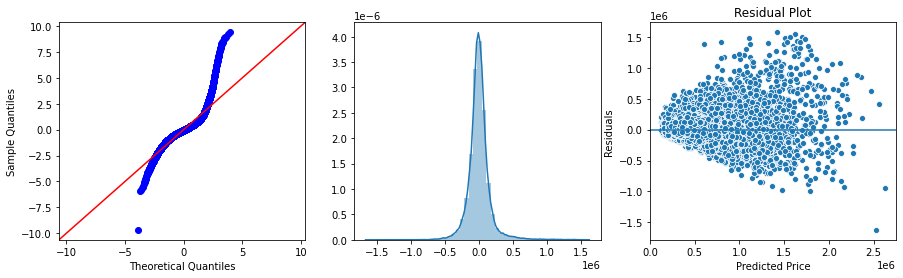

Jarque-Bera    163307.307954
Prob                0.000000
Skew                1.664389
Kurtosis           16.122024
dtype: float64


In [481]:
visualize_assumptions(model, X)

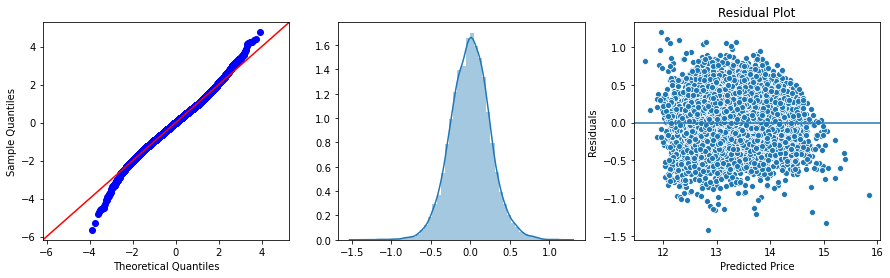

Jarque-Bera     5.266743e+02
Prob           4.306602e-115
Skew            1.072553e-03
Kurtosis        3.768776e+00
dtype: float64


In [482]:

# visualize log transform price
X = df3.drop('price', axis=1)
y = np.log(df3['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()

visualize_assumptions(model, X)

In [484]:
sorted(df7.columns)

['bathrooms/sqft',
 'beds/sqft',
 'price',
 'sqft_living_above',
 'view',
 'waterfront',
 'yr_renovated',
 'zipcat_1_x_sqft_living',
 'zipcat_2_x_sqft_living',
 'zipcat_3_x_sqft_living']

In [489]:
# non zero sqft

to_log = ['price', 'sqft_living']

to_log

['price', 'sqft_living']

In [491]:
df8 = df7.copy()

#reconstruct sqft_living so we can log transform it
df8['sqft_living'] = df8[['zipcat_1_x_sqft_living',
                          'zipcat_2_x_sqft_living',
                          'zipcat_3_x_sqft_living']].apply(sum, axis=1)

In [495]:
#back to dummies
dummies = df8[['zipcat_1_x_sqft_living',
               'zipcat_2_x_sqft_living',
               'zipcat_3_x_sqft_living']].applymap(lambda x: 1 if x > 0 else 0)

# drop the cols so we can add them back later.
df8 = df8.drop(columns=['zipcat_1_x_sqft_living',
                        'zipcat_2_x_sqft_living',
                        'zipcat_3_x_sqft_living'])
dummies.head()


,zipcat_1_x_sqft_living,zipcat_2_x_sqft_living,zipcat_3_x_sqft_living
id,,,
7129300520,1,0,0
6414100192,0,1,0
5631500400,0,1,0
2487200875,0,0,1
1954400510,0,1,0


In [496]:
for col in to_log:
    df8[col+'_log'] = np.log(df8[col])
    df8 = df8.drop(col, axis = 1)
df8.head()

,bathrooms/sqft,beds/sqft,sqft_living_above,view,waterfront,yr_renovated,price_log,sqft_living_log
id,,,,,,,,
7129300520,0.000847,0.002542,0,0.0,0.0,0.0,12.309982,7.073270
6414100192,0.000875,0.001167,0,0.0,0.0,1991.0,13.195614,7.851661
5631500400,0.001299,0.002597,0,0.0,0.0,0.0,12.100712,6.646391
2487200875,0.001531,0.002041,0,0.0,0.0,0.0,13.311329,7.580700
1954400510,0.001190,0.001786,0,0.0,0.0,0.0,13.142166,7.426549


In [498]:
df8['zipcat_1_x_sqft_living_log'] = (dummies['zipcat_1_x_sqft_living'] 
                                     * df8['sqft_living_log'])
df8['zipcat_2_x_sqft_living_log'] = (dummies['zipcat_2_x_sqft_living'] 
                                     * df8['sqft_living_log'])
df8['zipcat_3_x_sqft_living_log'] = (dummies['zipcat_3_x_sqft_living'] 
                                     * df8['sqft_living_log'])
df8 = df8.drop('sqft_living_log',axis=1)
df8.head(2)

,bathrooms/sqft,beds/sqft,sqft_living_above,view,waterfront,yr_renovated,price_log,zipcat_1_x_sqft_living_log,zipcat_2_x_sqft_living_log,zipcat_3_x_sqft_living_log
id,,,,,,,,,,
7129300520,0.000847,0.002542,0,0.0,0.0,0.0,12.309982,7.07327,0.000000,0.0
6414100192,0.000875,0.001167,0,0.0,0.0,1991.0,13.195614,0.00000,7.851661,0.0


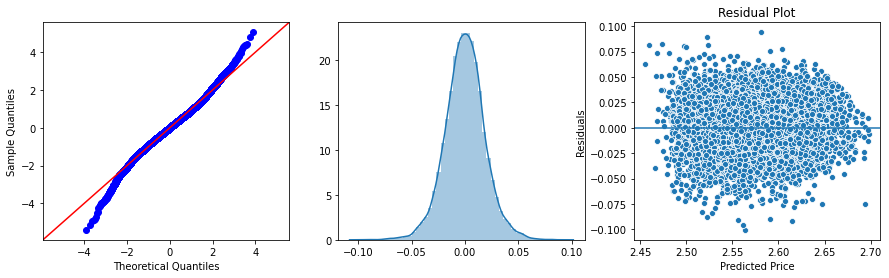

Jarque-Bera     9.535283e+02
Prob           8.789375e-208
Skew           -4.046036e-02
Kurtosis        4.031276e+00
dtype: float64


In [510]:
# visualize log transform price
X = df8.drop('price_log', axis=1)
y = np.log(df8['price_log'])

model = sm.OLS(y, sm.add_constant(X)).fit()

visualize_assumptions(model, X)

In [515]:
quicktest(X, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     8288.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:45:47   Log-Likelihood:                 54858.
No. Observations:               21386   AIC:                        -1.097e+05
Df Residuals:                   21376   BIC:                        -1.096e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1563      0.004    523.577      0.000       2.148       2.164
bathrooms/sqft                 2.5631      0.449      5.703      0.000       1.682       3.444
beds/sqft                     -4.2663      0.332    -12.834      0.000      -4.918      -3.615
sqft_living_above          -5.507e-06   1.65e-06     -3.340      0.001   -8.74e-06   -2.28e-06
view                           0.0051      0.000     26.932      0.000       0.005       0.005
waterfront                     0.0330      0.002     18.715      0.000       0.030       0.036
yr_renovated                1.766e-06   3.53e-07      4.998      0.000    1.07e-06    2.46e-06
zipcat_1_x_sqft_living_log     0.0514      0.000    109.651      0.000       0.050       0.052
zipcat_2_x_sqft_living_log     0.0553      0.000    117.930      0.000       0.054       0.056
zipcat_3_x_sqft_living_log     0.0584      0.000    124.126      0.000       0.057       0.059
==============================================================================
Omnibus:                      438.514   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              953.528
Skew:                          -0.040   Prob(JB):                    8.79e-208
Kurtosis:                       4.031   Cond. No.                     1.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{'r2': 0.777, 'train_rmse': 0.0, 'test_rmse': 0.0, 'diff_rmse': 0.0}

In [517]:
multicolinearity_check(df8.drop('price_log', axis=1))

,vif
bathrooms/sqft,13.588567
beds/sqft,11.463316
zipcat_1_x_sqft_living_log,5.431266
zipcat_3_x_sqft_living_log,5.344231
zipcat_2_x_sqft_living_log,5.248961
view,1.358134
waterfront,1.171290
yr_renovated,1.053960
sqft_living_above,1.008730


In the end we have 2 models.  One for predicting the price, and for explaining the effect o sqft_living_above, and bathrooms/sqft.

The other models is for predicting bedrooms/sqft.

In [522]:
#general model

X = df8.drop(columns = ['price_log', 'bathrooms/sqft'])
y = np.log(df8['price_log'])
bathroom_model = sm.OLS(y, sm.add_constant(X)).fit()
bathroom_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     9307.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:53:04   Log-Likelihood:                 54841.
No. Observations:               21386   AIC:                        -1.097e+05
Df Residuals:                   21377   BIC:                        -1.096e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1650      0.004    565.550      0.000       2.157       2.172
beds/sqft                     -4.2262      0.333    -12.706      0.000      -4.878      -3.574
sqft_living_above          -5.535e-06   1.65e-06     -3.354      0.001   -8.77e-06    -2.3e-06
view                           0.0050      0.000     26.729      0.000       0.005       0.005
waterfront                     0.0330      0.002     18.712      0.000       0.030       0.036
yr_renovated                1.776e-06   3.54e-07      5.021      0.000    1.08e-06    2.47e-06
zipcat_1_x_sqft_living_log     0.0506      0.000    113.006      0.000       0.050       0.051
zipcat_2_x_sqft_living_log     0.0545      0.000    121.679      0.000       0.054       0.055
zipcat_3_x_sqft_living_log     0.0576      0.000    128.049      0.000       0.057       0.058
==============================================================================
Omnibus:                      447.187   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.554
Skew:                          -0.057   Prob(JB):                    4.80e-211
Kurtosis:                       4.036   Cond. No.                     9.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [523]:
#bedroom model

X = df8.drop(columns = ['price_log', 'beds/sqft'])
y = np.log(df8['price_log'])
bed_model = sm.OLS(y, sm.add_constant(X)).fit()
bed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     9233.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:53:05   Log-Likelihood:                 54775.
No. Observations:               21386   AIC:                        -1.095e+05
Df Residuals:                   21377   BIC:                        -1.095e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.1180      0.003    743.641      0.000       2.112       2.124
bathrooms/sqft                 2.4411      0.451      5.412      0.000       1.557       3.325
sqft_living_above          -5.804e-06   1.65e-06     -3.507      0.000   -9.05e-06   -2.56e-06
view                           0.0052      0.000     27.524      0.000       0.005       0.006
waterfront                     0.0334      0.002     18.916      0.000       0.030       0.037
yr_renovated                1.811e-06   3.55e-07      5.105      0.000    1.12e-06    2.51e-06
zipcat_1_x_sqft_living_log     0.0554      0.000    159.416      0.000       0.055       0.056
zipcat_2_x_sqft_living_log     0.0593      0.000    171.794      0.000       0.059       0.060
zipcat_3_x_sqft_living_log     0.0625      0.000    179.778      0.000       0.062       0.063
==============================================================================
Omnibus:                      434.889   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.867
Skew:                          -0.032   Prob(JB):                    2.46e-206
Kurtosis:                       4.029   Cond. No.                     1.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""